In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# choose default setting or AMD setting

In [3]:
# default setting
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models

In [3]:
# AMD setting
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
os.environ["PLAIDML_EXPERIMENTAL"] = "1"
os.environ["PLAIDML_DEVICE_IDS"] = "opencl_amd_ellesmere.0"

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import layers, models

Using plaidml.keras.backend backend.


In [4]:
# start after setting

In [13]:
# you can change this values
class_names = ['Non', 'Cut', 'Dissolve', 'Fade']
batch_size = 10
train_steps = 400
valid_steps = 100
epochs = 10

In [14]:
# 
train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='train',
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='binary')
valid_data_gen = valid_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='valid',
                                                           target_size=(224, 224),
                                                           class_mode='binary')

Found 8000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.


In [15]:
vgg16_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
#vgg16_model.summary()
vgg16_model.trainable = False
model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
#model.summary()

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps=valid_steps
)

Epoch 1/10
400/400 [==============================] - 569s 1s/step - loss: 1.0378 - acc: 0.7195 - val_loss: 0.4691 - val_acc: 0.8030
Epoch 2/10
400/400 [==============================] - 570s 1s/step - loss: 0.3401 - acc: 0.8688 - val_loss: 0.3228 - val_acc: 0.8700
Epoch 3/10
400/400 [==============================] - 566s 1s/step - loss: 0.2168 - acc: 0.9240 - val_loss: 0.2739 - val_acc: 0.8970
Epoch 4/10
400/400 [==============================] - 566s 1s/step - loss: 0.2183 - acc: 0.9208 - val_loss: 0.6123 - val_acc: 0.8780
Epoch 5/10
400/400 [==============================] - 570s 1s/step - loss: 0.1315 - acc: 0.9503 - val_loss: 0.2796 - val_acc: 0.9090
Epoch 6/10
400/400 [==============================] - 569s 1s/step - loss: 0.1692 - acc: 0.9393 - val_loss: 0.2235 - val_acc: 0.9140
Epoch 7/10
400/400 [==============================] - 569s 1s/step - loss: 0.1064 - acc: 0.9618 - val_loss: 0.2321 - val_acc: 0.9240
Epoch 8/10
400/400 [==============================] - 570s 1s/step - 

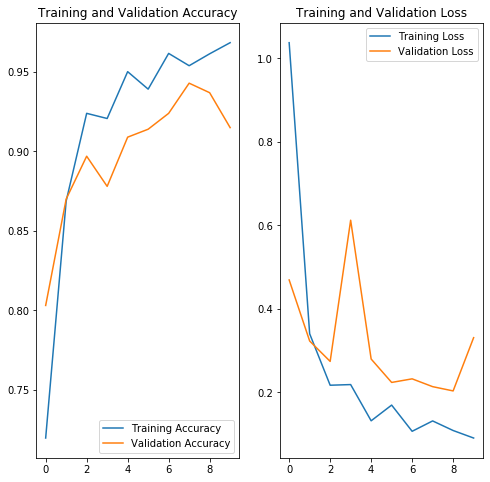

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()